# ML Project - Bank Marketing Prediction


> Reading dataset

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('bank-marketing.csv')
df

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,60000,married,tertiary,yes,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,55000,divorced,primary,yes,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,55000,married,secondary,yes,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,20000,married,secondary,yes,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


# Cleaning the data

- droping the data which is not giving proper information.

In [3]:
df2 = df.drop(df[df['education'] == 'unknown'].index, axis = 0, inplace = False)
df2

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
5,35,management,100000,married,tertiary,yes,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,100000,single,tertiary,no,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,60000,married,tertiary,yes,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,55000,divorced,primary,yes,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,55000,married,secondary,yes,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,20000,married,secondary,yes,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


- droping the outliers in the data.

In [4]:
from scipy.stats import zscore
print(df2['balance'].mean())
df2['baloutliers']= zscore(df2['balance'])
cle = (df2['baloutliers']>3) | (df2['baloutliers']<-3 )
df3 = df2.drop(df2[cle].index, axis = 0, inplace = False)
df4 = df3.drop('baloutliers', axis=1)

1355.226714951331


- droping the column 'contact' because it is of no use.

In [5]:
df5 = df4.drop('contact', axis=1)

- converting categorical month column to numerical.

In [6]:
df5['Month'] = df5['month']

In [7]:
Month = {"jan":1,"feb":2,"mar":3,"apr":4,"may":5,"jun":6,"jul":7,"aug":8,"sep":9,"oct":10,"nov":11,"dec":12}
df5['Month'] = [Month[item] for item in df5['Month']]
df5

,age,job,salary,marital,education,targeted,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,response,Month
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,5,may,261,1,-1,0,unknown,no,5
1,44,technician,60000,single,secondary,yes,no,29,yes,no,5,may,151,1,-1,0,unknown,no,5
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,5,may,76,1,-1,0,unknown,no,5
5,35,management,100000,married,tertiary,yes,no,231,yes,no,5,may,139,1,-1,0,unknown,no,5
6,28,management,100000,single,tertiary,no,no,447,yes,yes,5,may,217,1,-1,0,unknown,no,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,60000,married,tertiary,yes,no,825,no,no,17,nov,977,3,-1,0,unknown,yes,11
45207,71,retired,55000,divorced,primary,yes,no,1729,no,no,17,nov,456,2,-1,0,unknown,yes,11
45208,72,retired,55000,married,secondary,yes,no,5715,no,no,17,nov,1127,5,184,3,success,yes,11
45209,57,blue-collar,20000,married,secondary,yes,no,668,no,no,17,nov,508,4,-1,0,unknown,no,11


- droping the record of those customer who cut the call after knowning it is from bank(in the starting 5 sec).

In [8]:
df5['duration'] = df5['duration'].apply(lambda n:n/60).round(2)
df6 = df5.drop(df5[df5['duration']<5/60].index, axis = 0, inplace = False)
df6

,age,job,salary,marital,education,targeted,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,response,Month
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,5,may,4.35,1,-1,0,unknown,no,5
1,44,technician,60000,single,secondary,yes,no,29,yes,no,5,may,2.52,1,-1,0,unknown,no,5
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,5,may,1.27,1,-1,0,unknown,no,5
5,35,management,100000,married,tertiary,yes,no,231,yes,no,5,may,2.32,1,-1,0,unknown,no,5
6,28,management,100000,single,tertiary,no,no,447,yes,yes,5,may,3.62,1,-1,0,unknown,no,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,60000,married,tertiary,yes,no,825,no,no,17,nov,16.28,3,-1,0,unknown,yes,11
45207,71,retired,55000,divorced,primary,yes,no,1729,no,no,17,nov,7.60,2,-1,0,unknown,yes,11
45208,72,retired,55000,married,secondary,yes,no,5715,no,no,17,nov,18.78,5,184,3,success,yes,11
45209,57,blue-collar,20000,married,secondary,yes,no,668,no,no,17,nov,8.47,4,-1,0,unknown,no,11


In [9]:
df7 = df6.drop(df6[df6['poutcome'] == 'other'].index, axis = 0, inplace = False)
df7

,age,job,salary,marital,education,targeted,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,response,Month
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,5,may,4.35,1,-1,0,unknown,no,5
1,44,technician,60000,single,secondary,yes,no,29,yes,no,5,may,2.52,1,-1,0,unknown,no,5
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,5,may,1.27,1,-1,0,unknown,no,5
5,35,management,100000,married,tertiary,yes,no,231,yes,no,5,may,2.32,1,-1,0,unknown,no,5
6,28,management,100000,single,tertiary,no,no,447,yes,yes,5,may,3.62,1,-1,0,unknown,no,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45205,25,technician,60000,single,secondary,yes,no,505,no,yes,17,nov,6.43,2,-1,0,unknown,yes,11
45206,51,technician,60000,married,tertiary,yes,no,825,no,no,17,nov,16.28,3,-1,0,unknown,yes,11
45207,71,retired,55000,divorced,primary,yes,no,1729,no,no,17,nov,7.60,2,-1,0,unknown,yes,11
45208,72,retired,55000,married,secondary,yes,no,5715,no,no,17,nov,18.78,5,184,3,success,yes,11


- converting target column response to numerical for the better understanding of ML algorithm.

In [10]:
df7['Response'] = df7['response']
df7['Response'] = pd.get_dummies(df7['Response'], drop_first = True)

- Describeing the pdays column:
 > mean
 
 > median
 
 > mode

In [11]:
df['pdays'].describe()

count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

- mean = 40.197
- median = -1
- minimum = -1
yes,the minimum and the median value both are same -1.

-  Describe the pdays column : this time limiting to the relevant values of pdays. 

In [12]:
ddf = df.copy()

In [13]:
ddf.drop(ddf[ddf['pdays'] == -1].index, inplace = True)
ddf['pdays'].describe()

count    8257.000000
mean      224.577692
std       115.344035
min         1.000000
25%       133.000000
50%       194.000000
75%       327.000000
max       871.000000
Name: pdays, dtype: float64

- mean = 224.577
- median = 194
- minimum = 1
yes,there is a difference in a median and the mean value you can see previous mean is '40' but now it is '224'same withw median it changes from '-1' to '194'.

- A horizontal bar graph with the median values of balance for each education level value.

> importing matplot and seaborn liberaries for the better visualisation of data

In [14]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

In [15]:
ddf2 = df7.copy()

In [16]:
ddf2['Edu'] = df7['education']

In [17]:
Education = {"primary":1,"secondary":2,"tertiary":3}
ddf2['Edu'] = [Education[item] for item in ddf2['Edu']]

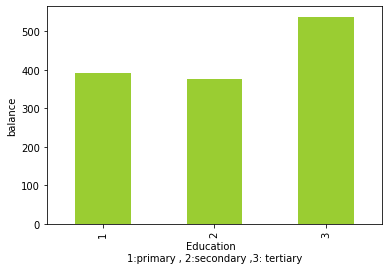

In [18]:
barG = ddf2[['Edu','balance']].groupby("Edu").median().plot(kind='bar',legend = False,color = 'yellowgreen')
barG.set_xlabel("Education  \n1:primary , 2:secondary ,3: tertiary")
barG.set_ylabel("balance")
plt.show()

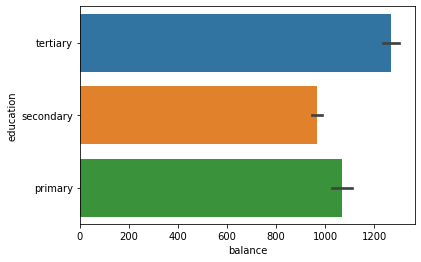

In [19]:
sns.barplot(ddf2["balance"],ddf2["education"])

In [20]:
#ddf2.groupby('Edu').median()
#if someone wants to se numbers.

> tertiary group has highest median value according to the graph.

- boxplot on pdays column to see outliers in the data.

outliers


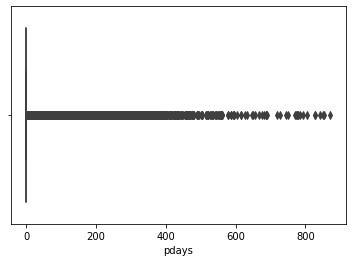

In [21]:
sns.boxplot(df7['pdays'])
print('outliers')

 > here we can see there is too many outliers point.

# EDA:  Exploratory Data Analysis 

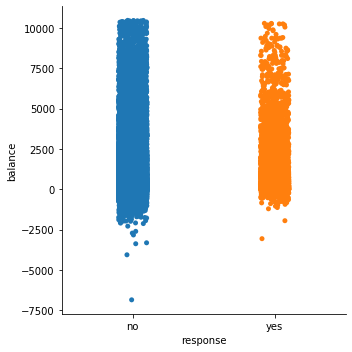

In [22]:
sns.catplot("response","balance",data = df7)

- by this chart we can say that the response of person was not depend on balance.

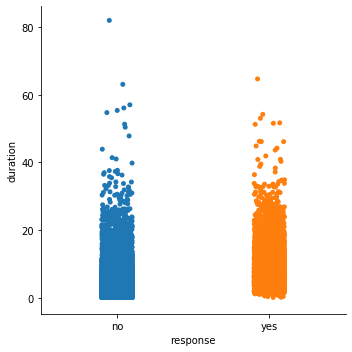

In [23]:
sns.catplot("response","duration",data = df7)

- by this chart we can say that when the duration of call is less ,the more is the chances of "No" as a response.

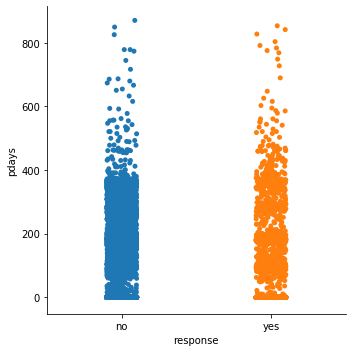

In [24]:
sns.catplot("response","pdays",data = df7)

- by this chart we can say that count of pday increases the chances of "yes" response is more.

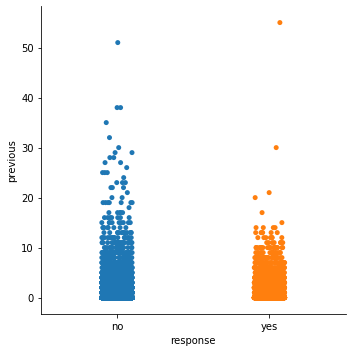

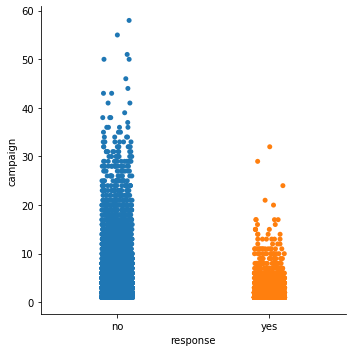

In [25]:
sns.catplot("response","previous",data = df7) 
sns.catplot("response","campaign",data = df7)

- by this chart we can say that there is no such relation between response and previous contact with a person.
same thing with campaign.

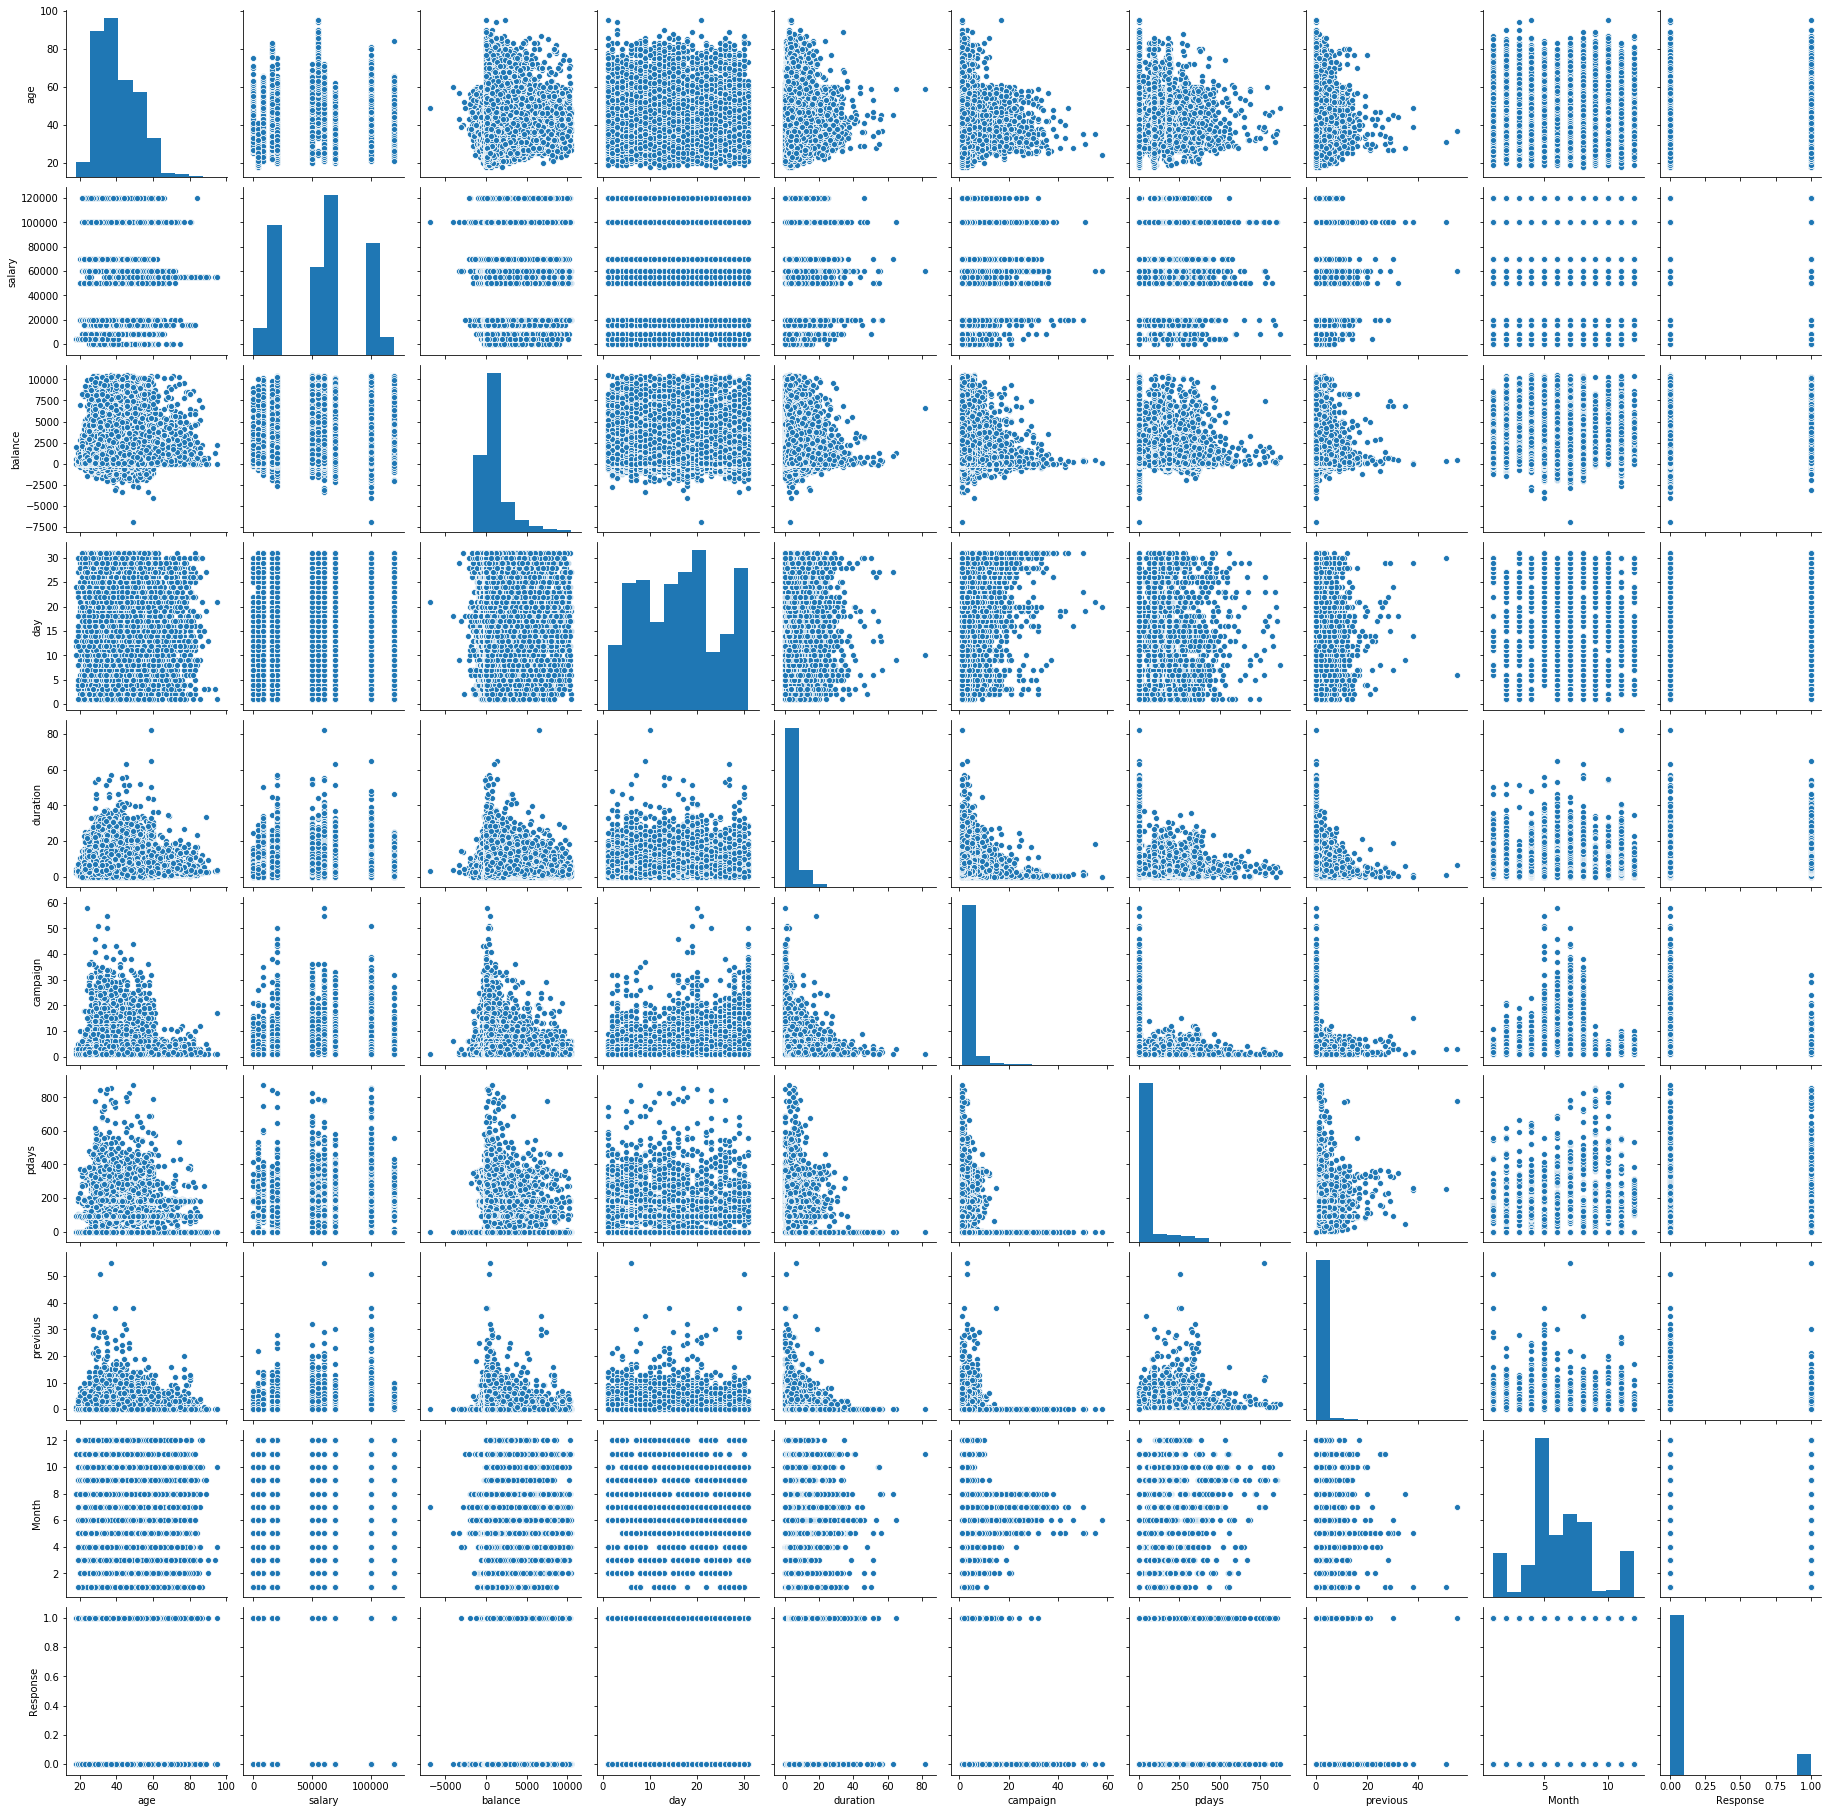

In [26]:
g= sns.pairplot(df7)

- by this pairplot we can say that the target variable "response" is related with all these column but best with duration.

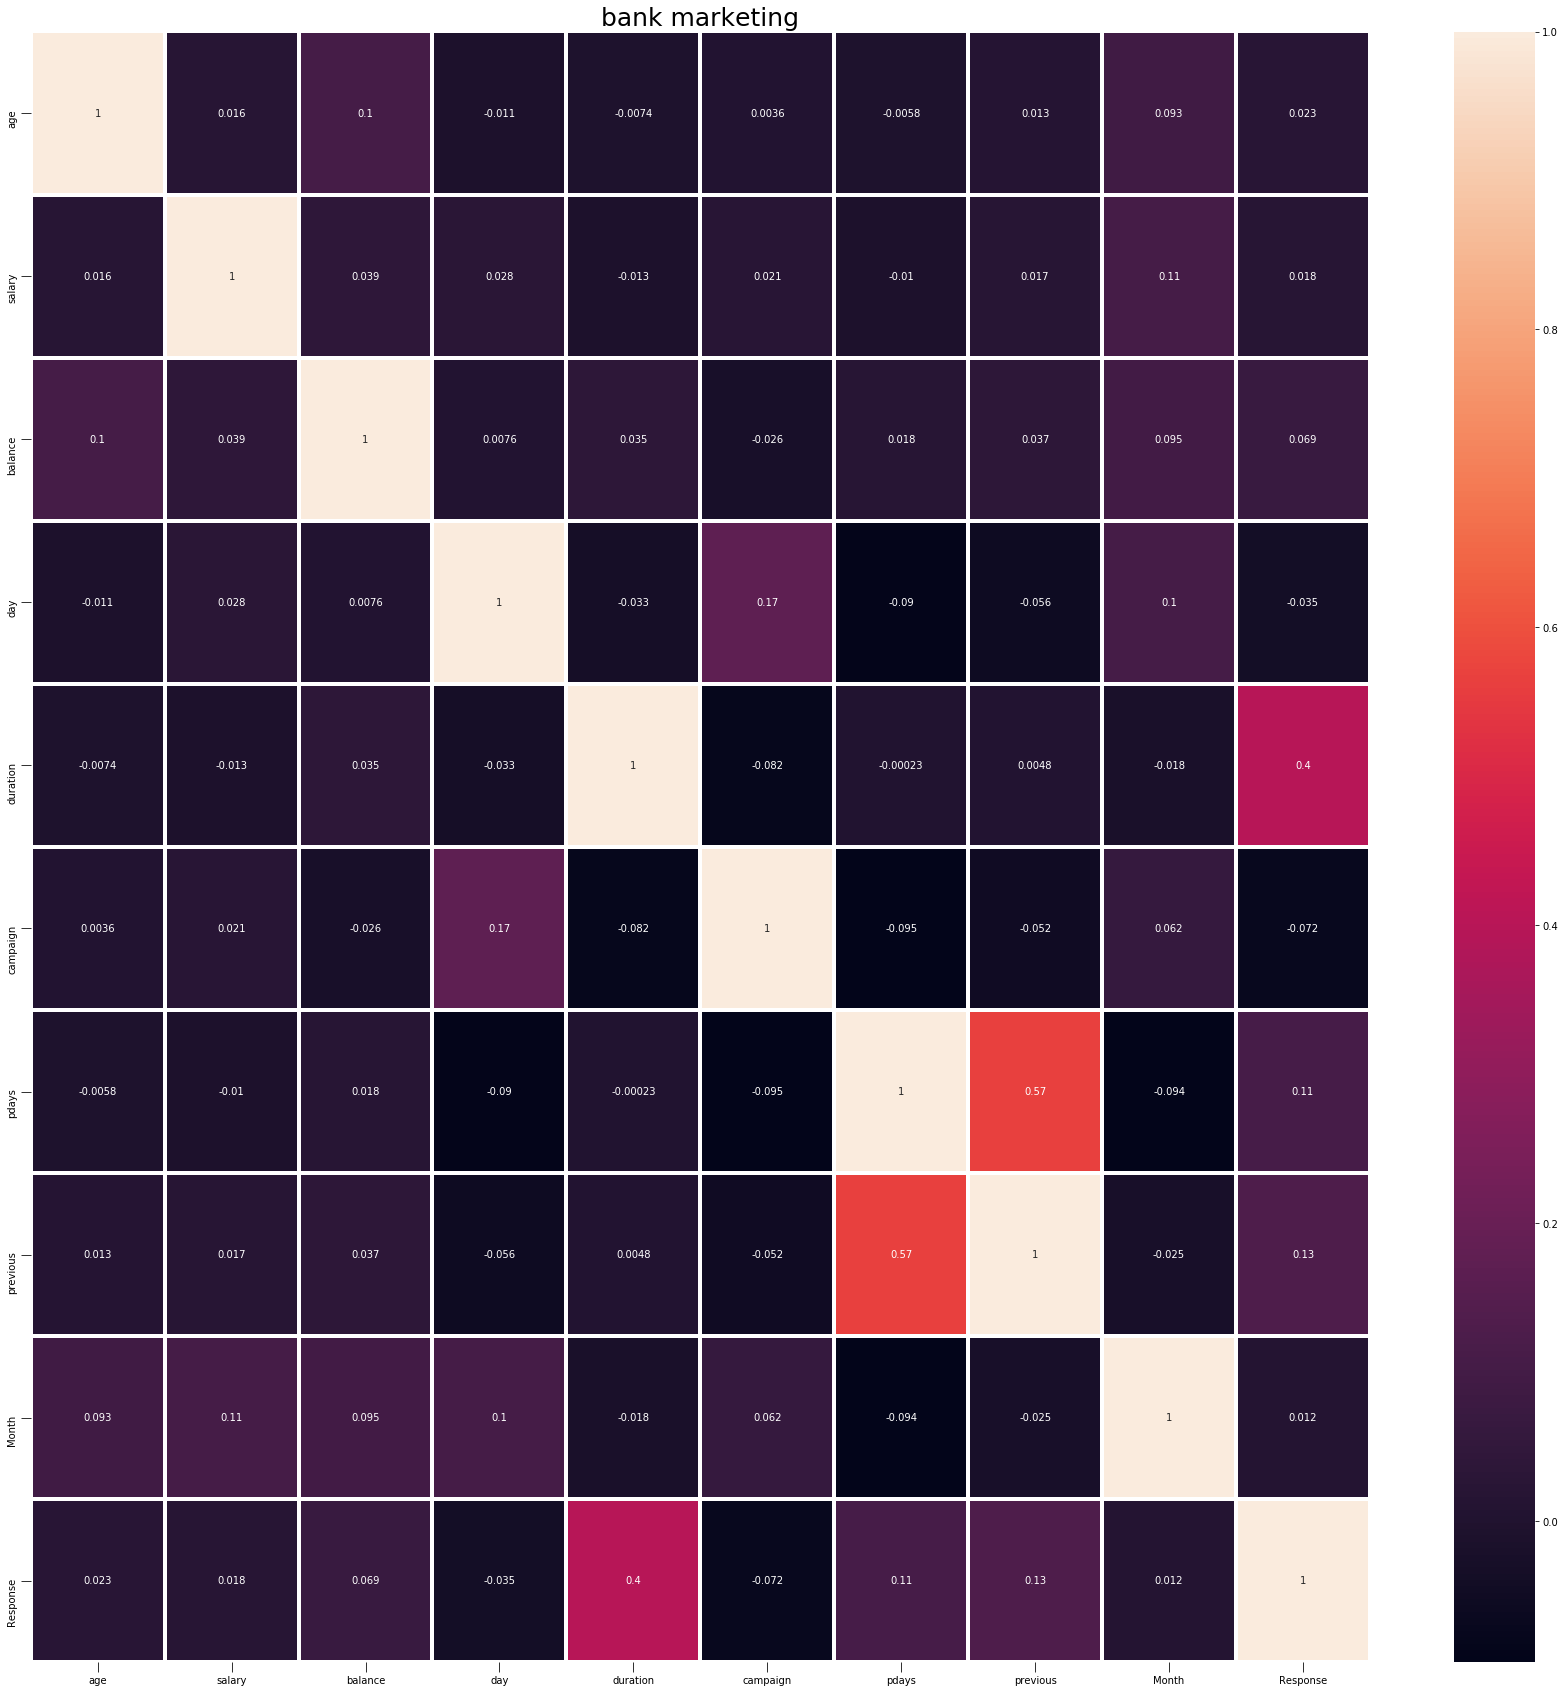

In [27]:
plt.figure(figsize=(30,30))
ax = sns.heatmap(df7.corr(), annot = True, linewidth = 3)
ax.tick_params(size = 10, labelsize = 10)
plt.title("bank marketing", fontsize = 25)
plt.show()

- by this heatmap we can say that response is highly correlated with duration column.

#  Machine Learning Algorithm

> droping column and data which are of no use.

In [28]:
df7.drop(['marital'],axis=1, inplace=True)
df8 = df7.iloc[:, 0:7]

In [29]:
df7.drop(['month'],axis=1, inplace=True)

In [30]:
df7.drop(['response'],axis=1, inplace=True)

> creating dummies to convert categorical variable to numerical.

In [31]:
df7 = pd.get_dummies(df7,drop_first=True)

In [32]:
df10=df7['Response'].copy()

In [33]:
df7.drop(['Response'],axis=1, inplace=True)

In [34]:
df7 = pd.merge(df7, df10, left_index = True, right_index = True)

 **LOGISTIC REGRESSION**.

> importing liberaries to apply algorithm on the data.

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

In [36]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()

In [37]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
import warnings
warnings.filterwarnings('ignore')

In [38]:
models = []
models.append(('LR', LogisticRegression()))

- splitting the data.

In [39]:
df_train, df_test = train_test_split(df7, test_size=0.2, random_state=51)

In [40]:
X_train = df_train.drop('Response', axis=1)
y_train = df_train['Response']
 
print('Shape of X = ', X_train.shape)
print('Shape of y = ', y_train.shape) 

Shape of X =  (32675, 28)
Shape of y =  (32675,)


### RFE

In [41]:
from sklearn.feature_selection import RFE

In [42]:
LR.fit(X_train, y_train)

rfe = RFE(LR, 10)  
rfe = rfe.fit(X_train, y_train)

In [43]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('age', False, 15),
 ('salary', False, 19),
 ('balance', False, 18),
 ('day', False, 16),
 ('duration', False, 4),
 ('campaign', False, 11),
 ('pdays', False, 17),
 ('previous', False, 13),
 ('Month', False, 14),
 ('job_blue-collar', False, 2),
 ('job_entrepreneur', False, 3),
 ('job_housemaid', True, 1),
 ('job_management', False, 8),
 ('job_retired', True, 1),
 ('job_self-employed', False, 5),
 ('job_services', False, 6),
 ('job_student', True, 1),
 ('job_technician', False, 7),
 ('job_unemployed', False, 12),
 ('job_unknown', True, 1),
 ('education_secondary', False, 10),
 ('education_tertiary', False, 9),
 ('targeted_yes', True, 1),
 ('default_yes', True, 1),
 ('housing_yes', True, 1),
 ('loan_yes', True, 1),
 ('poutcome_success', True, 1),
 ('poutcome_unknown', True, 1)]

In [44]:
col = X_train.columns[rfe.support_]
col

Index(['job_housemaid', 'job_retired', 'job_student', 'job_unknown',
       'targeted_yes', 'default_yes', 'housing_yes', 'loan_yes',
       'poutcome_success', 'poutcome_unknown'],
      dtype='object')

In [45]:
X_train_rfe = X_train[col]

In [46]:
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [47]:
LR = sm.OLS(y_train,X_train_rfe).fit()

### VIF

In [48]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,16.75
9,poutcome_success,1.29
10,poutcome_unknown,1.28
7,housing_yes,1.07
2,job_retired,1.04
5,targeted_yes,1.02
8,loan_yes,1.02
1,job_housemaid,1.01
3,job_student,1.01
6,default_yes,1.01


In [49]:
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_rfe)
LR = sm.OLS(y_train,X_train_lm).fit()  
print(LR.summary())

                            OLS Regression Results                            
Dep. Variable:               Response   R-squared:                       0.115
Model:                            OLS   Adj. R-squared:                  0.115
Method:                 Least Squares   F-statistic:                     425.9
Date:                Sat, 01 Aug 2020   Prob (F-statistic):               0.00
Time:                        17:24:20   Log-Likelihood:                -6914.1
No. Observations:               32675   AIC:                         1.385e+04
Df Residuals:                   32664   BIC:                         1.394e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2089      0.007  

In [50]:
array = df7.values
X = array[:,0:-1]
Y = array[:,-1]

In [51]:
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=0.2, random_state=51)

In [52]:
import warnings
warnings.filterwarnings('ignore')
result = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=51)    
    croresult = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')    
    result.append(croresult)
    output = "%s: %f (%f)" % (name, croresult.mean(), croresult.std())
    print(output)

LR: 0.891140 (0.006599)


In [53]:
LR = LogisticRegression()
LR.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [54]:
predictions = LR.predict(X_test)

- Accuracy score-

In [55]:
print(accuracy_score(Y_test, predictions))

0.8921532623332109


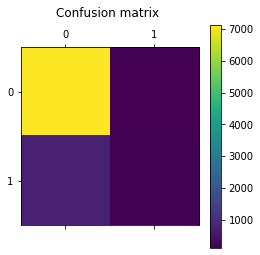

In [56]:
from sklearn.metrics import confusion_matrix
import pylab as pl
cm = confusion_matrix(Y_test, predictions)
pl.matshow(cm)
pl.title('Confusion matrix \n')
pl.colorbar()
pl.show()

**RANDOM FOREST**

In [57]:
array = df7.values
X = array[:,0:-1]
Y = array[:,-1]

- Train test split.

In [58]:
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=0.2, random_state=51)

In [59]:
from sklearn.ensemble import RandomForestClassifier

In [60]:
models = []
models.append(('RFC', RandomForestClassifier()))

In [61]:
result = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=51)
    croresults = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='neg_mean_squared_error')
    result.append(croresults)
    output = "%s: %f (%f)" % (name, croresults.mean(), croresults.std())
    print(output)

RFC: -0.094139 (0.003635)


In [62]:
RFC = RandomForestClassifier(n_estimators=50)
RFC.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [63]:
predictions = RFC.predict(X_test)

- Accuracy score-

In [64]:
print(accuracy_score(Y_test, predictions))

0.9056188027910393


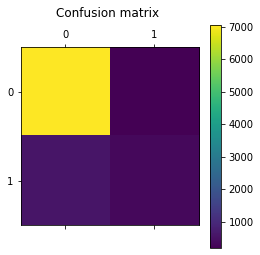

In [65]:
from sklearn.metrics import confusion_matrix
import pylab as pl
cm = confusion_matrix(Y_test, predictions)
pl.matshow(cm)
pl.title('Confusion matrix \n')
pl.colorbar()
pl.show()

- The best metric is of randomforest but actually by these confusion matrix we can say that the dataset is highly unbalanced, with nearly all client actually decline to subscribe.This says that the accuracy score is biased, and further evaluation should be carried out to determine the accuracy of logistic regression model.

- By all these evaluation we can say that the random forest model perform well on the dataset as the score is high.

- By the evaluation we can say that the top feature is "Duration".